In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import the required tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [4]:
# Load the data
df = pd.read_csv("./drive/MyDrive/heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
df.shape

(918, 12)

In [6]:
df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

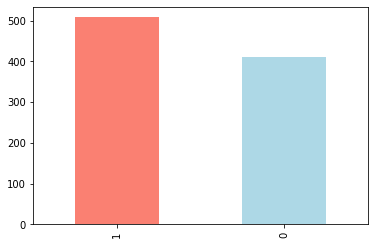

In [7]:
df["HeartDisease"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [10]:
pd.api.types.is_string_dtype(df["Sex"])

True

In [11]:
for labels,columns in df.items():
    if pd.api.types.is_string_dtype(columns):
        print(labels)

Sex
ChestPainType
RestingECG
ExerciseAngina
ST_Slope


In [12]:
# To turn string to category
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(5), float64(1), int64(6)
memory usage: 55.4 KB


In [14]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [15]:
df["Sex"].cat.categories

Index(['F', 'M'], dtype='object')

In [16]:
df.Sex.cat.codes

0      1
1      0
2      1
3      0
4      1
      ..
913    1
914    1
915    1
916    0
917    1
Length: 918, dtype: int8

In [17]:
df.ChestPainType.cat.codes

0      1
1      2
2      1
3      0
4      2
      ..
913    3
914    0
915    0
916    1
917    2
Length: 918, dtype: int8

In [18]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [19]:
df.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [20]:
df.Sex

0      M
1      F
2      M
3      F
4      M
      ..
913    M
914    M
915    M
916    F
917    M
Name: Sex, Length: 918, dtype: category
Categories (2, object): ['F' < 'M']

In [21]:
pd.crosstab(df.HeartDisease,df.Sex)

Sex,F,M
HeartDisease,,
0,143,267
1,50,458


In [27]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes + 1

In [28]:
# Split the data into x and y
x = df.drop('HeartDisease',axis=1)

y = df['HeartDisease']

x.head(), y.head()

(   Age  Sex  ChestPainType  RestingBP  ...  MaxHR  ExerciseAngina  Oldpeak  ST_Slope
 0   40    2              2        140  ...    172               1      0.0         3
 1   49    1              3        160  ...    156               1      1.0         2
 2   37    2              2        130  ...     98               1      0.0         3
 3   48    1              1        138  ...    108               2      1.5         2
 4   54    2              3        150  ...    122               1      0.0         3
 
 [5 rows x 11 columns], 0    0
 1    1
 2    0
 3    1
 4    0
 Name: HeartDisease, dtype: int64)

In [29]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,2,2,140,289,0,2,172,1,0.0,3
1,49,1,3,160,180,0,2,156,1,1.0,2
2,37,2,2,130,283,0,3,98,1,0.0,3
3,48,1,1,138,214,0,2,108,2,1.5,2
4,54,2,3,150,195,0,2,122,1,0.0,3


In [30]:
#  Split the data into train and test sets
np.random.seed(42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [31]:
x_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,2,3,120,240,1,2,194,1,0.8,1
25,36,2,3,130,209,0,2,178,1,0.0,3
84,56,2,1,150,213,1,2,125,2,1.0,2
10,37,1,3,130,211,0,2,142,1,0.0,3
344,51,2,1,120,0,1,2,104,1,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
106,48,1,1,120,254,0,3,110,1,0.0,3
270,45,2,1,120,225,0,2,140,1,0.0,3
860,60,2,1,130,253,0,2,144,2,1.4,3
435,60,2,1,152,0,0,3,118,2,0.0,3


In [32]:
len(x_test) , len(y_test)

(184, 184)

In [33]:
# models = {"Logistic Regression" : LogisticRegression(),
#           "KNN": KNeighborsClassifier(),
#           "Random Forest": RandomForestClassifier()}

# def fit_and_score(models,x_train,x_test,y_train,y_test):
#     np.random.seed(42)
#     model_scores = {}
#     for name,model in models.items():
#         model.fit(x_train,y_train)
#         model_scores[name] = model.score(x_test,y_test)
#     return model_scores

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int8   
 2   ChestPainType   918 non-null    int8   
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int8   
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int8   
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int8   
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), int8(5)
memory usage: 54.8 KB


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int8   
 2   ChestPainType   918 non-null    int8   
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int8   
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int8   
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int8   
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), int8(5)
memory usage: 54.8 KB


In [91]:
for k,v in df.items():
  x = df[k].max()
  df[k] = v/x

In [94]:
# Split the data into x and y
x = df.drop('HeartDisease',axis=1)

y = df['HeartDisease']

x.head(), y.head()


(        Age  Sex  ChestPainType  ...  ExerciseAngina   Oldpeak  ST_Slope
 0  0.519481  1.0           0.50  ...             0.5  0.000000  1.000000
 1  0.636364  0.5           0.75  ...             0.5  0.161290  0.666667
 2  0.480519  1.0           0.50  ...             0.5  0.000000  1.000000
 3  0.623377  0.5           0.25  ...             1.0  0.241935  0.666667
 4  0.701299  1.0           0.75  ...             0.5  0.000000  1.000000
 
 [5 rows x 11 columns], 0    0.0
 1    1.0
 2    0.0
 3    1.0
 4    0.0
 Name: HeartDisease, dtype: float64)

In [99]:
tf.random.set_seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [36]:
models = {"Logistic Regression" : LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [37]:
fit_and_score(models,x_train,x_test,y_train,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'KNN': 0.7010869565217391,
 'Logistic Regression': 0.842391304347826,
 'Random Forest': 0.8804347826086957}

In [41]:
model = RandomForestClassifier()

In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x_train, y_train, cv=5)

In [44]:
scores

array([0.8707483 , 0.88435374, 0.84353741, 0.85714286, 0.85616438])

In [45]:
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(2,20,2)}

In [147]:
np.random.seed(42)

rs = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=rf_grid,
                       cv=5,
                       n_iter=20,
                       verbose=True)

rs.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [148]:
rs.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 14,
 'n_estimators': 510}

In [149]:
rs.score(x_test,y_test)

0.907608695652174

In [153]:
x_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
671,0.792208,1.0,0.25,0.69,0.275290,0.0,0.333333,0.618812,1.0,0.580645,0.666667
905,0.870130,1.0,0.75,0.76,0.351575,0.0,0.333333,0.742574,0.5,0.129032,0.666667
863,0.779221,1.0,0.75,0.70,0.306799,0.0,0.333333,0.767327,0.5,0.483871,0.666667
255,0.688312,0.5,0.75,0.60,0.454395,0.0,0.666667,0.643564,0.5,0.000000,1.000000
815,0.883117,1.0,0.75,0.59,0.459370,0.0,0.666667,0.747525,0.5,0.161290,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
400,0.649351,0.5,0.25,0.80,0.000000,1.0,0.666667,0.544554,0.5,0.000000,0.666667
524,0.714286,1.0,0.25,0.75,0.265340,0.0,1.000000,0.742574,0.5,0.000000,1.000000
652,0.766234,1.0,1.00,0.80,0.452736,0.0,0.333333,0.618812,0.5,0.000000,1.000000
287,0.688312,1.0,0.50,0.60,0.300166,0.0,0.666667,0.653465,0.5,0.000000,1.000000


In [173]:
x_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
547,0.792208,1.0,1.00,0.710,0.331675,1.0,1.000000,0.495050,0.5,0.241935,0.333333
58,0.701299,1.0,0.25,0.750,0.605307,0.0,1.000000,0.663366,0.5,0.161290,1.000000
128,0.701299,0.5,0.50,0.600,0.381426,1.0,0.666667,0.693069,0.5,0.000000,1.000000
176,0.701299,1.0,0.25,0.700,0.358209,0.0,0.666667,0.519802,0.5,0.241935,0.666667
767,0.701299,0.5,0.75,0.540,0.442786,0.0,0.333333,0.826733,0.5,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
555,0.753247,1.0,0.75,0.750,0.363184,0.0,1.000000,0.584158,1.0,0.000000,0.666667
557,0.727273,1.0,0.75,0.685,0.344942,1.0,1.000000,0.603960,1.0,0.290323,0.666667
206,0.454545,1.0,0.50,0.600,0.510779,0.0,0.333333,0.891089,0.5,0.000000,1.000000
276,0.662338,1.0,0.75,0.675,0.265340,0.0,0.666667,0.742574,0.5,0.322581,0.666667


In [177]:
y_preds_1 = rs.predict([[1,1,0.7,0.33,1,1,1,0.49,0.5,0.24,0.33]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [178]:
y_preds_1

array([1.])

In [181]:
y_preds = rs.predict(x_test)

In [191]:
count = 0
x = 0
for i in y_test:
  if i == y_preds[x]:
    count += 1
  x += 1
print(f"Accuracy Acheived: {count/184*100:.2f}%")

Accuracy Acheived: 90.76%
